# Wrangle WeRateDogs Twitter Dataset

## Intoduction 


The dataset that we will analyze and discover after wrangling is WeRateDogs. twitter account. This account rates dogs. The ratings almost always have a denominator of 10 and the numerators almost always greater than 10.
First of all, we have to gather the required datasets files from different sources. csv file that contains WeRateDogs twitter archive, tsv file that derived according to a neural network to predict breeds of dogs using dogs’ images, and text file queried using Twitter API.


In [1]:
#import required packages
import pandas as pd
import requests
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Data Wrangling

#### Gather

In [2]:
#read csv file
twittes_df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#make directory if it doesn't already exist
folder_name ='image_pred'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [4]:
#download image-predictions.tsv file from Udacity's servers 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join(folder_name,url.split('/')[-1]) ,mode='wb')as file:
    file.write(response.content)

In [5]:
#list of file in the folder
os.listdir(folder_name)

['image-predictions.tsv']

In [6]:
#read tsv file
predict_df=pd.read_csv('image_pred/image-predictions.tsv',sep='\t')

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twittes_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


In [7]:
#read json file
retwe_fav_df = pd.read_json('tweet-json.txt' ,lines=True)
columns = ['id', 'retweet_count', 'favorite_count']
retwe_fav_df=retwe_fav_df[columns]

#### Assess

In [256]:
twittes_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [257]:
twittes_df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1878,675047298674663426,NaN,NaN,2015-12-10 20:19:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a fluffy albino Bacardi Columbia mix. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675047298...,11,10,a,None,None,None,None
1037,744709971296780288,NaN,NaN,2016-06-20 01:54:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Harvey. He's stealthy af. 10/10 would ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/744709971...,10,10,Harvey,None,None,None,None
654,791821351946420224,NaN,NaN,2016-10-28 01:58:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This little fella really hates ...,6.848310e+17,4.196984e+09,2016-01-06 20:16:44 +0000,"https://vine.co/v/eEZXZI1rqxX,https://vine.co/...",13,10,None,None,None,pupper,None
337,832397543355072512,NaN,NaN,2017-02-17 01:13:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Eevee. She wants to see how you're doi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/832397543...,12,10,Eevee,None,None,None,None
738,780800785462489090,NaN,NaN,2016-09-27 16:06:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He has a weird relationship with...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/780800785...,11,10,Koda,None,None,None,None
1619,684959798585110529,NaN,NaN,2016-01-07 04:48:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's a neat dog. No legs (tragi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684959798...,5,10,Jerry,None,None,None,None
80,877316821321428993,NaN,NaN,2017-06-21 00:06:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Dante. At first he wasn't a fan of his ne...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/877316821...,13,10,Dante,None,None,None,None
358,830097400375152640,NaN,NaN,2017-02-10 16:53:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Samson. He's absolute fluffy perfection. ...,NaN,NaN,NaN,"https://www.gofundme.com/sick-baby-samson,http...",13,10,Samson,None,None,None,None
804,772117678702071809,NaN,NaN,2016-09-03 17:02:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jack. He's a Clemson pup. Appears to be r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772117678...,12,10,Jack,None,None,None,None
670,789986466051088384,NaN,NaN,2016-10-23 00:27:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Happy. He's a bathtub reviewer. Seems ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/789986466...,12,10,Happy,None,None,None,None


In [258]:
twittes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [259]:
#retweets
twittes_df[pd.notnull(twittes_df['retweeted_status_id'])]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [260]:
#count of the retweets
twittes_df[pd.notnull(twittes_df['retweeted_status_id'])]['tweet_id'].count()

181

In [261]:
twittes_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [262]:
#duplicated rows
sum(twittes_df.duplicated())

0

In [8]:
#null values in name column
sum(twittes_df.name.isnull())

0

In [13]:
#null values in doggo column
sum(twittes_df.doggo.isnull())

0

In [14]:
#null values in floofe rcolumn
sum(twittes_df.floofer.isnull())

0

In [15]:
#null values in pupper column
sum(twittes_df.pupper.isnull())

0

In [16]:
#null values in puppo column
sum(twittes_df.puppo.isnull())

0

In [263]:
predict_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [264]:
predict_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [265]:
predict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [266]:
predict_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [267]:
#duplicated rows
sum(predict_df.duplicated())

0

In [268]:
retwe_fav_df

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [269]:
retwe_fav_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [270]:
retwe_fav_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 73.6 KB


In [271]:
retwe_fav_df.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [272]:
#duplicated rows
sum(retwe_fav_df.duplicated())

0

##### Quality
##### `twittes_df` table:
- Erroneous data types(timestamp and retweeted_status_timestamp).
- Some rows with these columns have values (retweeted_status_user_id and retweeted_status_timestamp)(we want original tweet no retweets).
- Null represented as None in name, doggo, floofer, pupper and puppo columns.
- Erroneous data types(retweet_count and favorite_count) after merging .
  


##### `predict_df` table:
- Missing records(2075 instead of 2356). 
- Non descriptive column headers(p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,and p3_dog).

##### `retwe_fav_df` table:
- Missing records (2354 instead of 2356).
- Non descriptive columns header(id).


##### Tidiness
- retwe_fav_df table belongs to twittes_df table
- doggo, floofer, pupper and puppo they are one variable

### Clean


In [18]:
#make copies
twittes_df_clean = twittes_df.copy()
predict_df_clean = predict_df.copy()
retwe_fav_df_clean = retwe_fav_df.copy()

#### Tidiness

###### doggo, floofer, pupper and puppo they are one variable ,Null represented as None in name, doggo, floofer, pupper and puppo columns

Define

Create dog_stage column and drop doggo,floofer,pupper and puppo columns, first, replace None to NaN in these columns.

Code

In [19]:
#replace None to NaN 
twittes_df_clean.doggo = twittes_df_clean.doggo.replace('None',np.nan)
twittes_df_clean.floofer = twittes_df_clean.floofer.replace('None',np.nan)
twittes_df_clean.pupper = twittes_df_clean.pupper.replace('None',np.nan)
twittes_df_clean.puppo = twittes_df_clean.puppo.replace('None',np.nan)
twittes_df_clean.name = twittes_df_clean.name.replace('None',np.nan)

In [20]:
#create a data frame
stage_df= twittes_df_clean[['doggo','floofer','pupper','puppo']]
#create a dog_stage column
stage_df['dog_stage'] = stage_df.ffill(1).iloc[:, -1]
#Add dog_stage column to df table
twittes_df_clean['dog_stage'] = stage_df.dog_stage
#drop doggo,floofer,pupper and puppo columns 
twittes_df_clean = twittes_df_clean.drop(['doggo','floofer','pupper','puppo'] ,axis=1)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Test

In [317]:
stage_df.head(15)

,doggo,floofer,pupper,puppo,dog_stage
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN
9,doggo,NaN,NaN,NaN,doggo


In [21]:
twittes_df_clean.head(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo


###### retwe_fav_df table belongs to twittes_df  table ,  the non descriptive column header (id) in retwe_fav_df table ,as well as  the missing records in retwe_fav_df table 

Define

Merge retwe_fav_df table with twittes_df table,by first rename the column name (id) in retwe_fav_df table to tweet_id, by merging we merge common tweet_id in both tables and that solve missing records in retwe_fav_df table 

Code

In [22]:
#rename id to tweet_id in retwe_fav_df_clean table
retwe_fav_df_clean.rename(columns = {'id':'tweet_id'}, inplace = True)

Test

In [322]:
retwe_fav_df_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [23]:
#Merge retwe_fav_df_clean to df table  
twittes_df_clean = pd.merge(twittes_df_clean, retwe_fav_df_clean ,on=['tweet_id'],
                   how='left')

In [24]:
list(twittes_df_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage',
 'retweet_count',
 'favorite_count']

In [25]:
twittes_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1611 non-null object
dog_stage                     380 non-null object
retweet_count                 2354 non-null float64
favorite_count                2354 non-null float64
dtypes: float64(6), int64(3), object(7)
memory usage: 312.9+ KB


##### Quality

##### retweet_count and favorite_count are now float data type after merging ,because NaN values so int is converted to float 



Define

Repalce NaN values to 0,then convert retweet_count and favorite_count from float to int data type 

Code

In [26]:
#Repalce NaN values to 0,then convert retweet_count and favorite_count from float to int 
twittes_df_clean.retweet_count = twittes_df_clean.retweet_count.replace(np.NaN,0).astype(int)
twittes_df_clean.favorite_count = twittes_df_clean.favorite_count.replace(np.NaN,0).astype(int)

Test

In [27]:
twittes_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1611 non-null object
dog_stage                     380 non-null object
retweet_count                 2356 non-null int64
favorite_count                2356 non-null int64
dtypes: float64(4), int64(5), object(7)
memory usage: 312.9+ KB


#### Erroneous data types(timestamp and retweeted_status_timestamp) in twittes_df table

Define

Convert timestamp and retweeted_status_timestamp to datetime data type

Code

In [28]:
#convert timestamp and retweeted_status_timestamp to datetime data type
twittes_df_clean.timestamp = pd.to_datetime(twittes_df_clean.timestamp)
twittes_df_clean.retweeted_status_timestamp = pd.to_datetime(twittes_df_clean.retweeted_status_timestamp)

Test

In [29]:
twittes_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1611 non-null object
dog_stage                     380 non-null object
retweet_count                 2356 non-null int64
favorite_count                2356 non-null int64
dtypes: datetime64[ns](2), float64(4), int64(5), object(5)
memory usag

##### Some rows in twittes_df table have values in these columns  (retweeted_status_user_id and retweeted_status_timestamp)(since,we want original tweets no retweets)

Define


Drop rows that do not contain NaN values in retweeted_status_user_id and retweeted_status_timestamp columns.

Code

In [30]:
#create a data frame contains rows that do not contain NaN values in retweeted_status_user_id 
#and retweeted_status_timestamp columns
retweet_df=twittes_df_clean[pd.notnull(twittes_df_clean['retweeted_status_id'])]
retweet_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,NaN,0,0
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07,https://twitter.com/dog_rates/status/886053434...,12,10,NaN,NaN,108,0
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,NaN,19297,0
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,NaN,7181,0
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,NaN,1349,0
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,NaN,6965,0
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49,https://twitter.com/rachel2195/status/87685077...,14,10,NaN,pupper,83,0
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,NaN,15546,0
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,NaN,12518,0
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,pupper,1667,0


In [31]:
#concat the both data frames ,if thers is any overlap it will be captured by drop_duplicates()
#keep=False > Drop all duplicates
twittes_df_clean=pd.concat([twittes_df_clean, retweet_df]).drop_duplicates(keep=False)

Test

In [32]:
#It should be 0
twittes_df_clean[pd.notnull(twittes_df_clean['retweeted_status_id'])]['tweet_id'].count()

0

##### Non descriptive column headers(p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,and p3_dog) in predict_df table

Define

Rename (p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,and p3_dog)columns in predict_df table 

Code

In [33]:
#rename (p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,and p3_dog)columns 
predict_df_clean.rename(columns = {'p1':'predic1',
                                   'p1_conf':'predic1_conf',
                                   'p1_dog':'predic1_dog',
                                   'p2':'predic2',
                                   'p2_conf':'predic2_conf',
                                   'p2_dog':'predic2_dog',
                                   'p3':'predic3',
                                   'p3_conf':'predic3_conf',
                                   'p3_dog':'predic3_dog'}, inplace = True)

Test

In [34]:
predict_df_clean.head()

,tweet_id,jpg_url,img_num,predic1,predic1_conf,predic1_dog,predic2,predic2_conf,predic2_dog,predic3,predic3_conf,predic3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True



#### Missing records in predict_df table  , and dog_stage  data type


Define

Merging the predict_df table with twittes_df table to get one main table,as a result we solve missing records in predict_df table and get only common tweet_id, as final step convert dog_stage from string to category data type

Code

In [35]:
#get main data frame by merging twittes_df with predict_df
twitter_archive_master = pd.merge(twittes_df_clean, predict_df_clean ,on=['tweet_id'],
                   how='inner')

In [36]:
#convert dog_stage data type from string to category data type
twitter_archive_master.dog_stage = twitter_archive_master.dog_stage.astype('category')

Test

In [37]:
twitter_archive_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,predic1,predic1_conf,predic1_dog,predic2,predic2_conf,predic2_dog,predic3,predic3_conf,predic3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [38]:
list(twitter_archive_master)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage',
 'retweet_count',
 'favorite_count',
 'jpg_url',
 'img_num',
 'predic1',
 'predic1_conf',
 'predic1_dog',
 'predic2',
 'predic2_conf',
 'predic2_dog',
 'predic3',
 'predic3_conf',
 'predic3_dog']

In [39]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 27 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null datetime64[ns]
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1448 non-null object
dog_stage                     306 non-null category
retweet_count                 1994 non-null int64
favorite_count                1994 non-null int64
jpg_url                       1994 non-null object
img_num                

### Storing The Cleaned Data Frame

In [40]:
#Store the main data frame as csv file
twitter_archive_master.to_csv('twitter_archive_master.csv',index=False)

In [41]:
#read the main data frame
twitter_archive_master=pd.read_csv('twitter_archive_master.csv')
twitter_archive_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,predic1,predic1_conf,predic1_dog,predic2,predic2_conf,predic2_dog,predic3,predic3_conf,predic3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


### Analyzing and Visualizing

Let's now discover interesting things from this new data frame and posing some questions. 

##### What is the median of favorite_count in this account? 

In [42]:
twitter_archive_master.favorite_count.median()

4136.0

##### What is the median of retweet_count in this account?

In [43]:
twitter_archive_master.retweet_count.median()

1359.5

##### Related to dog stage what is th max retweet_count for each dog stage?

In [44]:
dog_stage_retweet=twitter_archive_master.groupby('dog_stage')['retweet_count'].max()
dog_stage_retweet

dog_stage
doggo      79515
floofer    18497
pupper     32883
puppo      48265
Name: retweet_count, dtype: int64

##### Related to dog stage what is th max favorite_count for each dog stage?


In [45]:
dog_stage_favorite=twitter_archive_master.groupby('dog_stage')['favorite_count'].max()
dog_stage_favorite

dog_stage
doggo      131075
floofer     33345
pupper     106827
puppo      132810
Name: favorite_count, dtype: int64

##### To get  better view let's visualize the max retweet_count and max favorite_count based on dog stage

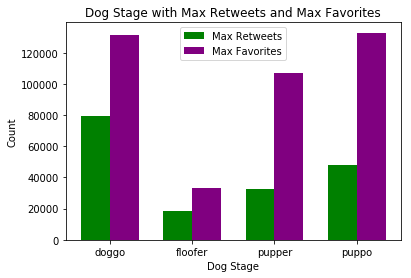

In [46]:
#x lcations 
ind = np.arange(len(dog_stage_favorite))
width = 0.35

#plot bars
green_bars = plt.bar(ind, dog_stage_retweet, width, color='green',
                     label='Max Retweets')

purple_bars = plt.bar(ind+width, dog_stage_favorite, width, color='purple',
                      label='Max Favorites')
#xtick locations
locations = ind + width /2
#xtick labels
labels = ['doggo','floofer','pupper','puppo']
plt.xticks(locations,labels)

#labels & title
plt.ylabel('Count')
plt.xlabel('Dog Stage')
plt.title('Dog Stage with Max Retweets and Max Favorites')

#legend
plt.legend();




Resources:     
https://knowledge.udacity.com/questions/19704

https://stackoverflow.com/questions/21202652/getting-all-rows-with-nan-value

https://stackoverflow.com/questions/51357485/combine-multi-columns-to-one-column-pandas

https://stackoverflow.com/questions/37313691/how-to-remove-a-pandas-dataframe-from-another-dataframe

https://stackoverflow.com/questions/41870093/pandas-shift-converts-my-column-from-integer-to-float